Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from keras.layers.core import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Dataset

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.duplicated().sum()

0

Data ini memiliki 7043 baris dan 21 kolom, untuk data Nan dan data duplikat di data ini tidak ada, dan data sudah cukup bersih

In [7]:
for i in data.columns:
    print(f"{[i]} \n {data[i].unique()} \n")

['customerID'] 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

['gender'] 
 ['Female' 'Male'] 

['SeniorCitizen'] 
 [0 1] 

['Partner'] 
 ['Yes' 'No'] 

['Dependents'] 
 ['No' 'Yes'] 

['tenure'] 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

['PhoneService'] 
 ['No' 'Yes'] 

['MultipleLines'] 
 ['No phone service' 'No' 'Yes'] 

['InternetService'] 
 ['DSL' 'Fiber optic' 'No'] 

['OnlineSecurity'] 
 ['No' 'Yes' 'No internet service'] 

['OnlineBackup'] 
 ['Yes' 'No' 'No internet service'] 

['DeviceProtection'] 
 ['No' 'Yes' 'No internet service'] 

['TechSupport'] 
 ['No' 'Yes' 'No internet service'] 

['StreamingTV'] 
 ['No' 'Yes' 'No internet service'] 

['StreamingMovies'] 
 ['No' 'Yes' 'No internet service'] 

['Contract'] 
 ['Month-to-month' 'One year' 'Two year

In [8]:
data["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
3139.8      1
1378.45     1
676.7       1
2157.3      1
75.05       1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
data[data['TotalCharges'] == ' ']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
data.drop(data[data['TotalCharges'] == ' '].index, inplace = True)


In [11]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')
data.drop(columns = ['customerID'], inplace=True)

Berawal dari tipe data yang cukup aneh, kolom total charges ini yang berisi numerik tetapi memiliki tipe data object, setelah melakukan pengecekan ternyata ada data string kosong yang membuat data ini menjadi object, ada 11 data, disini saya menghapus data tersebut, dikarenakan juga value yang sedikit, lalu saya menghapus kolom customer id karena sekilas tidak terlalu penting untuk kasus sekarang.

In [12]:
data1=data.copy()

## EDA

In [13]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

Disini saya merubah dulu tipe data dari Kolom Senior Citizen, untuk kebutuhan visualisasi saja

In [14]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [15]:
data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

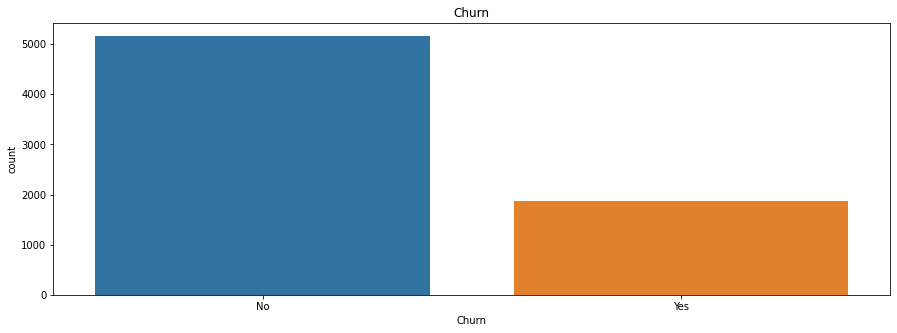

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x = data["Churn"])
plt.title("Churn")
plt.show()

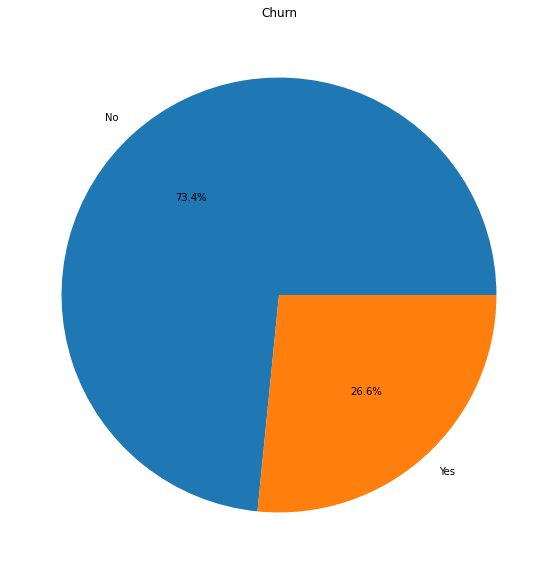

In [17]:
plt.figure(figsize = (10,10))
plt.pie(data['Churn'].value_counts(), labels=data['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title("Churn")
plt.show()

Di data ini terdapat 5163 data yang no atau tidak churn, sekitar 73.4% dari keseluruhan data, sedangkan ada 1869 data yang yes atau churn, sekitar 26,6%, sekilas data ini cukup imbalance juga

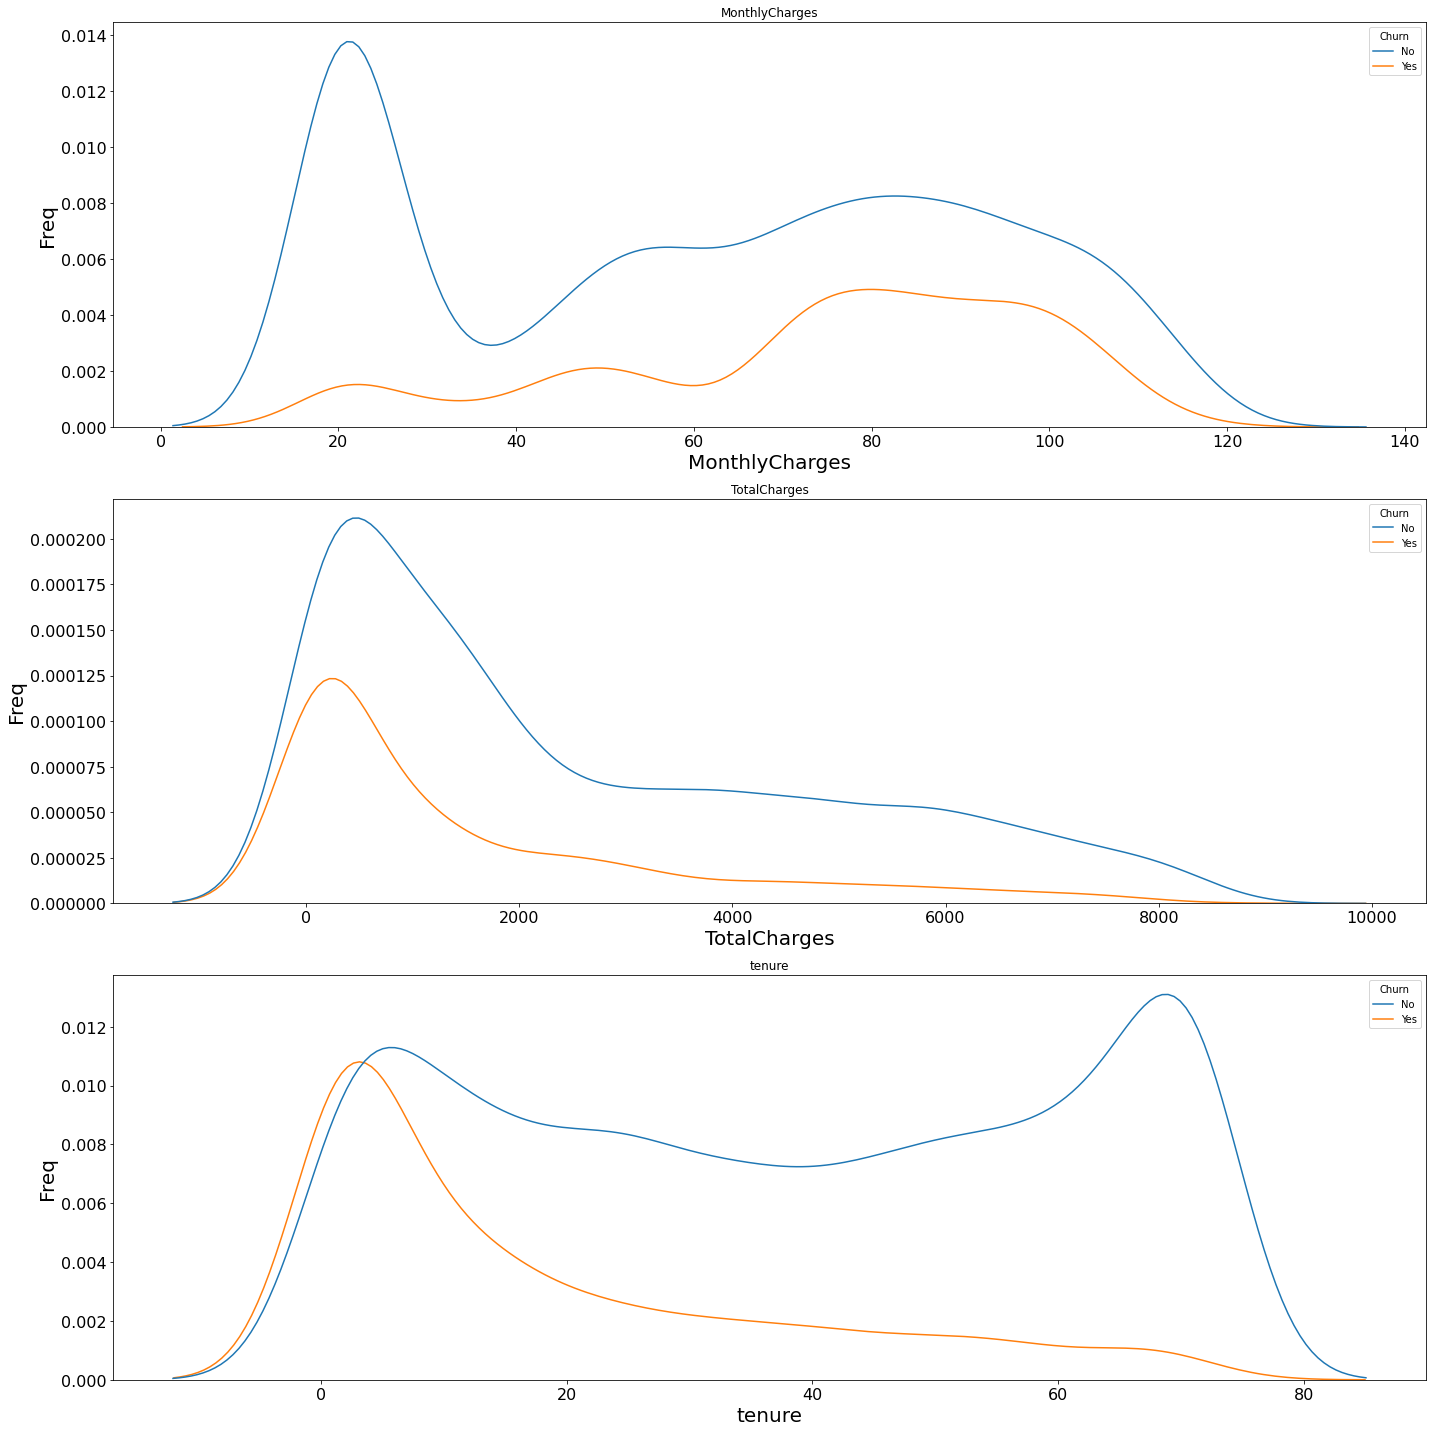

In [18]:
cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
plt.figure(figsize=(20, 20))
for i in range(len(cols)):
    plt.subplot(len(cols)//1, 1, i+1)
    ax = sns.kdeplot(
        x = data[cols[i]],
        hue = data["Churn"]
    )
    ax.set_xlabel(str(cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(cols[i]))
plt.tight_layout()
plt.show()

Dilihat dari grafik MonthlyCharges, TotalCharges dan tenure, client yang Churn kebanyakan memiliki monthly charges yang besar, total charges yang cenderung rendah dan tenure yang rendah, mungkin ini dikarenakan banyaknya biaya yang perlu dibayar setiap bulanya berdasarkan monthly charges, sehingga potensi churn akan semakin besar juga, berbanding terbalik dengan client yang tidak churn, kebanyakan berada di monthly charges rendah dan tenure yang tinggi, dikarenakan bisa jadi client ini tidak terlalu terbebani oleh biaya bulanan yang dikeluarkan

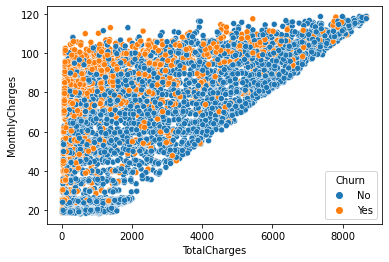

In [19]:
sns.scatterplot(x=data['TotalCharges'], y=data['MonthlyCharges'], hue=data['Churn'])

Dilihat dari grafik scatterplot diatas, makin tinggi totalcharges biasanya makin tinggi juga monthly charges, client yang churn banyak berada di monthlycharges tinggi dengan total charges yang rendah

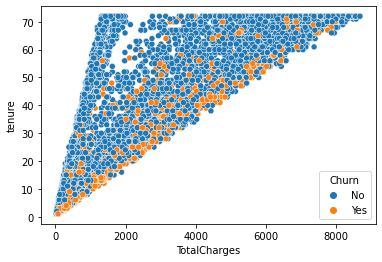

In [20]:
sns.scatterplot(x=data['TotalCharges'], y=data['tenure'], hue=data['Churn'])

Dilihat dari grafik diatas, biasanya total charges tinggi maka tenure juga tinggi, client churn kebanyakan berada di totalcharges rendah dengan tenure yang rendah juga

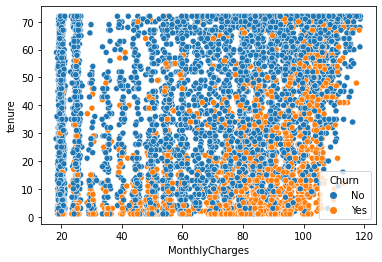

In [21]:
sns.scatterplot(x=data['MonthlyCharges'], y=data['tenure'], hue=data['Churn'])

Dilihat dari grafik diatas, tidak terlalu berhubungan antara Monthlycharges dan tenure, namun kebanyakan client yang churn berada di monthlycharges tinggi dan tenure yang rendah, ini bisa jadi dikarenakan biaya bulanan yang tinggi sehingga tenure tidak dapat lama, dan potensi churn juga lebih tinggi.

In [22]:
cat_col = list(data.select_dtypes("object").columns)

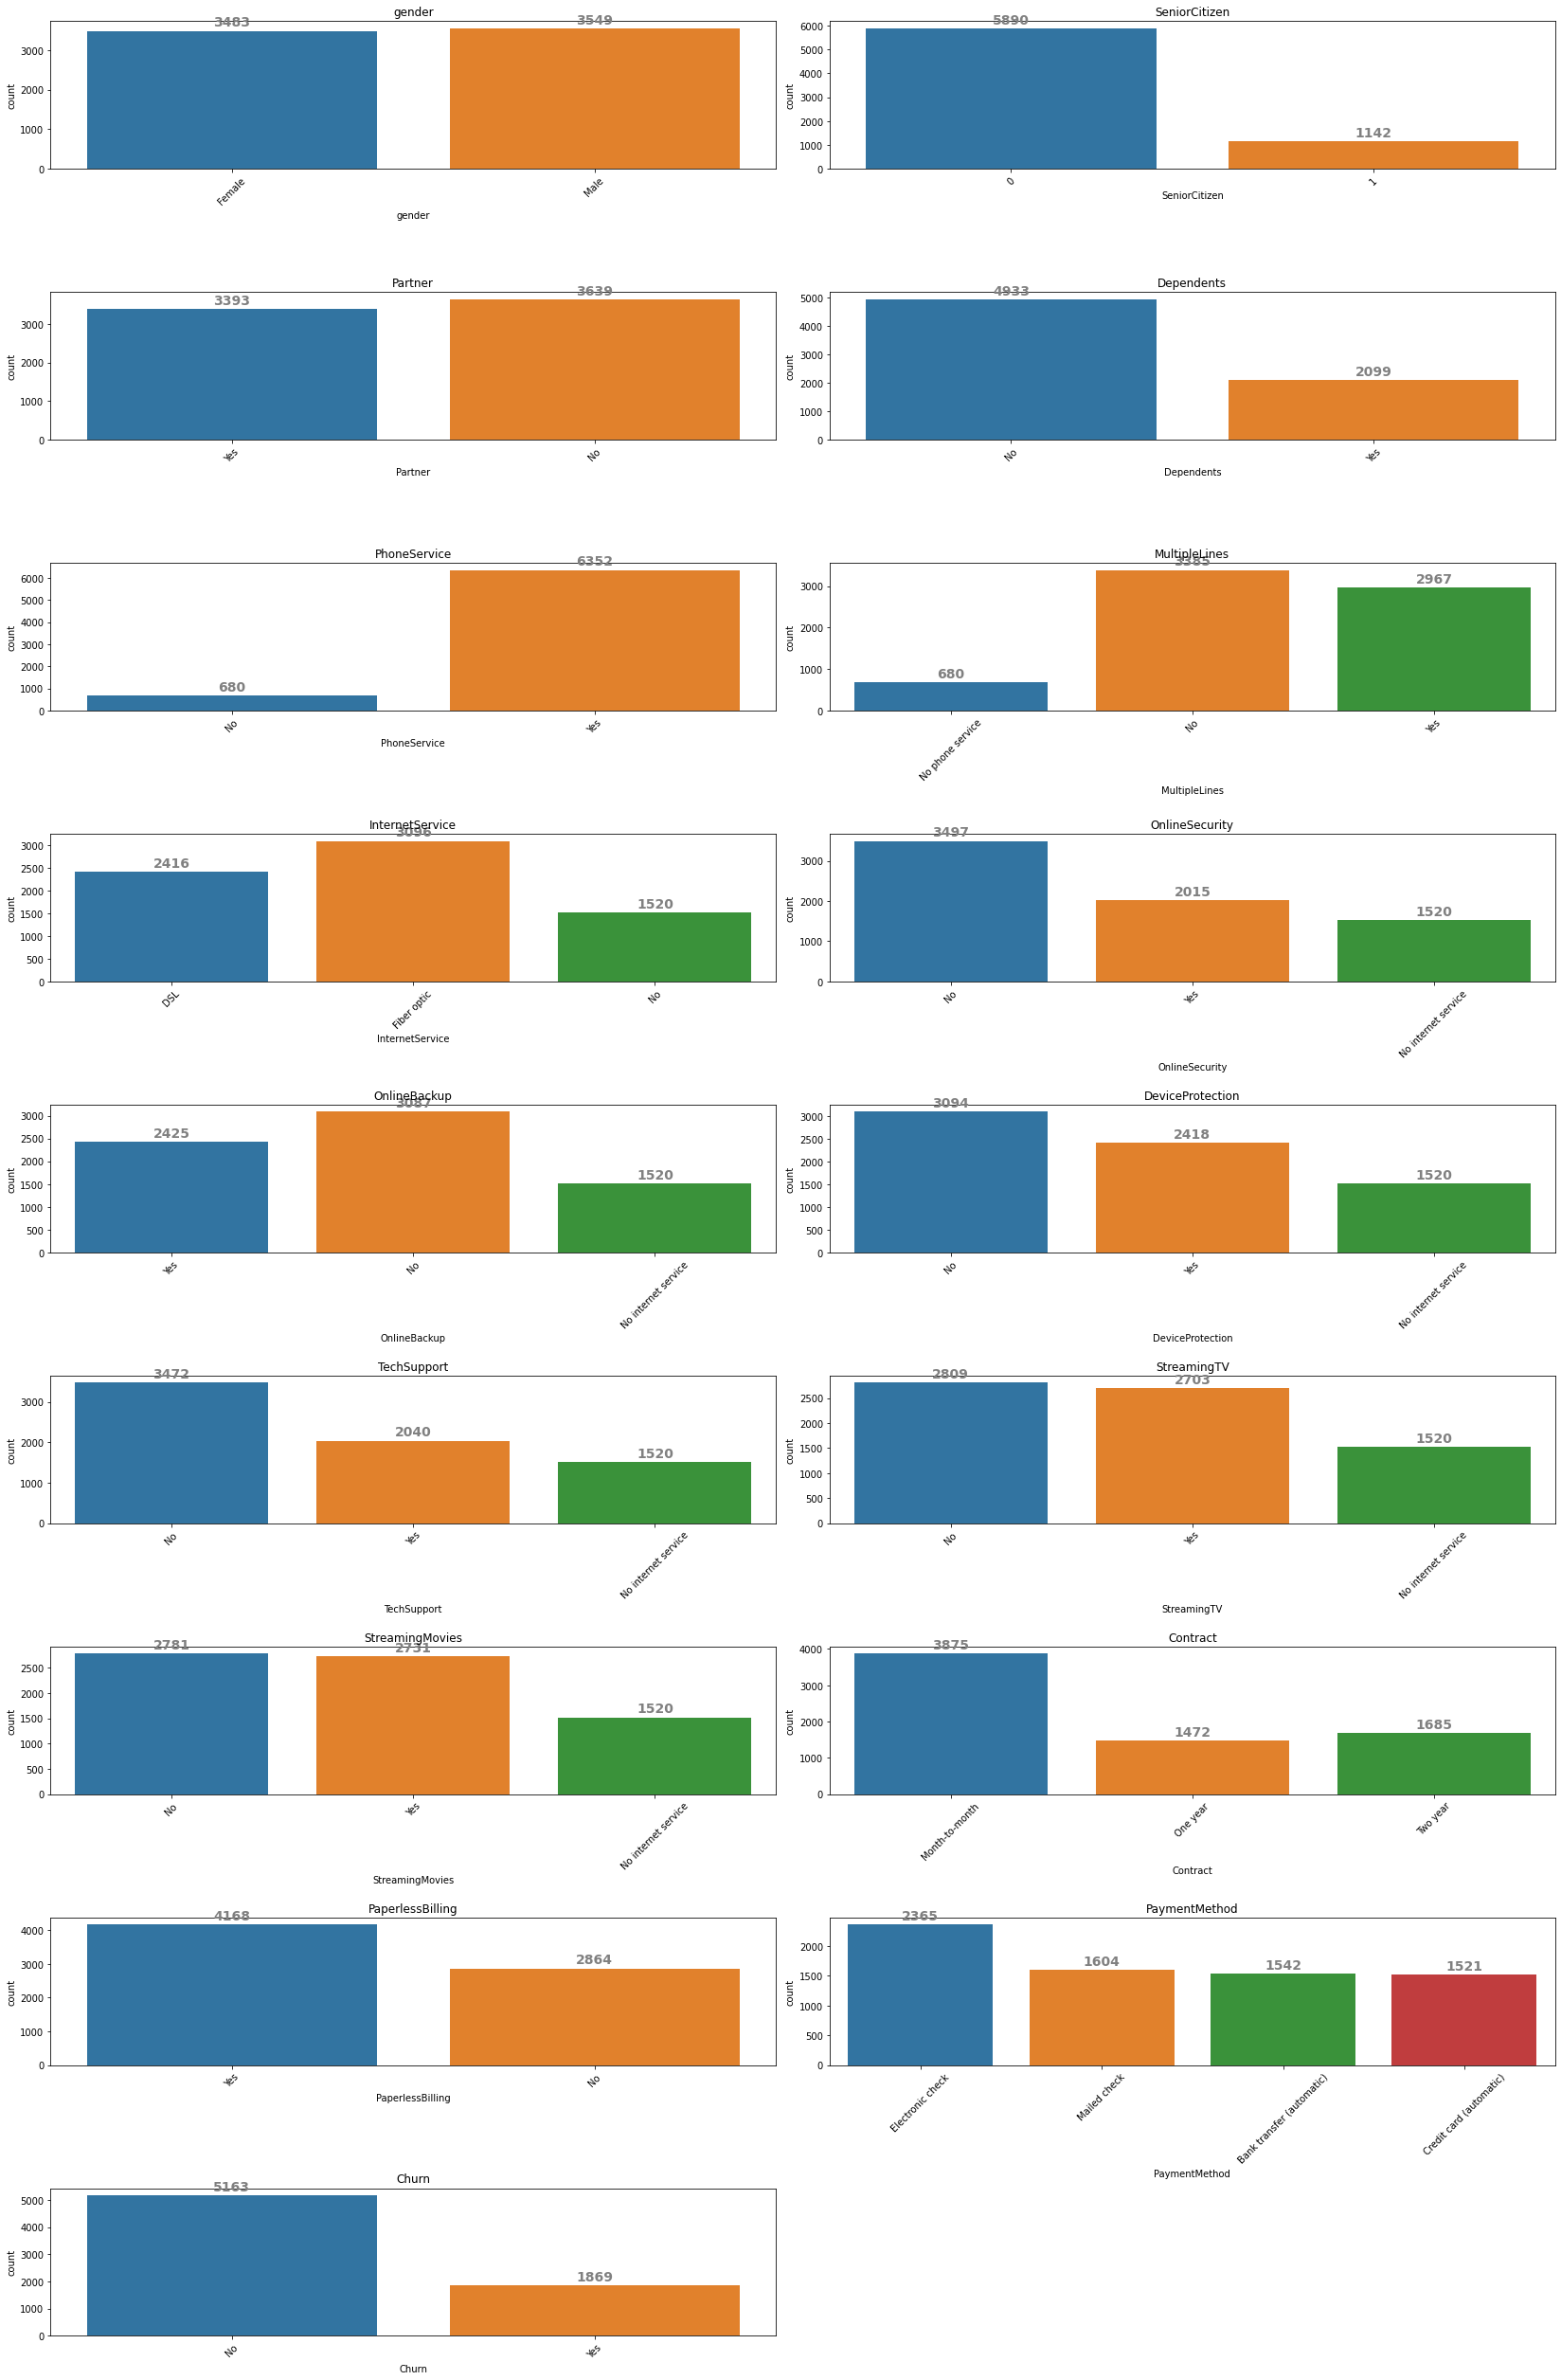

In [23]:
plt.figure(figsize = (23, 35))
for i in range(len(cat_col)):
    plt.subplot(len(cat_col)//2+1, 2, i + 1)
    ax = sns.countplot(
        x = data[cat_col[i]]
    )
    for j in ax.patches:
        ax.annotate(
            format(j.get_height(), '.0f'),
            (j.get_x() + j.get_width() / 2., j.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    plt.title(str(cat_col[i]))
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Grafik diatas hanya untuk menlihat jumlah dari masing2 kolom

### Demographic

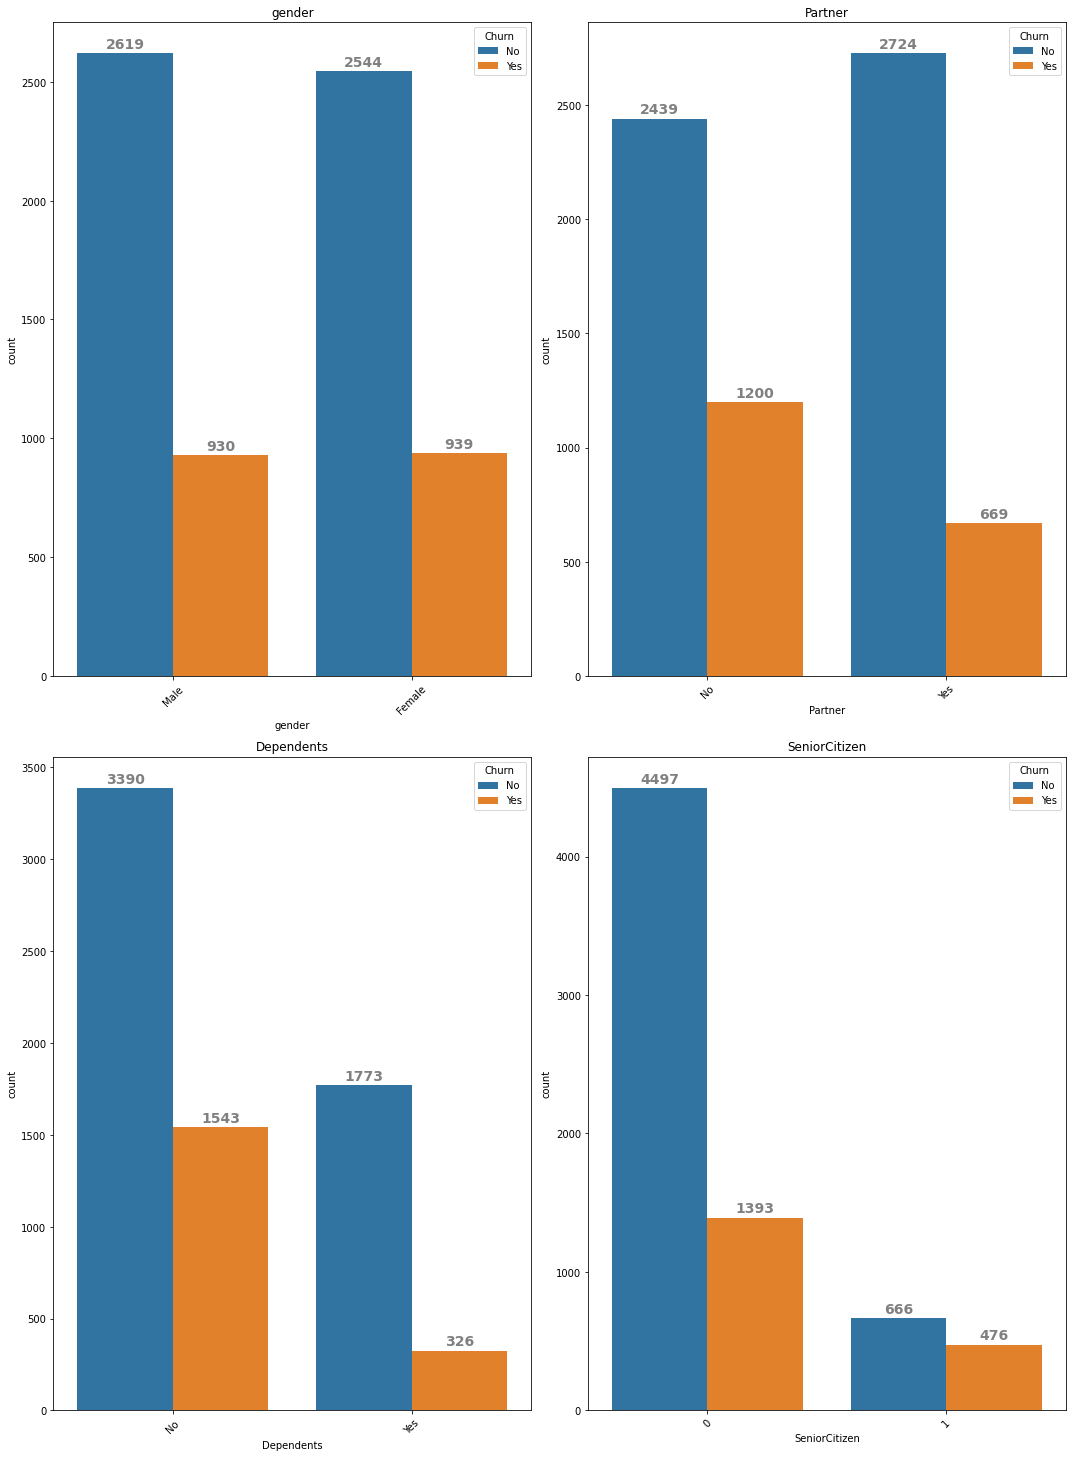

In [24]:
citi = ['gender', 'Partner', 'Dependents', 'SeniorCitizen']
plt.figure(figsize = (15, 30))
for i in range(len(citi)):
    plt.subplot(len(citi)//2+1, 2, i + 1)
    ax = sns.countplot(
        x = data[citi[i]],
        hue = data['Churn'],
        order = data[citi[i]].value_counts().sort_values(ascending = False).index
    )
    for j in ax.patches:
        ax.annotate(
            format(j.get_height(), '.0f'),
            (j.get_x() + j.get_width() / 2., j.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    plt.title(str(citi[i]))
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

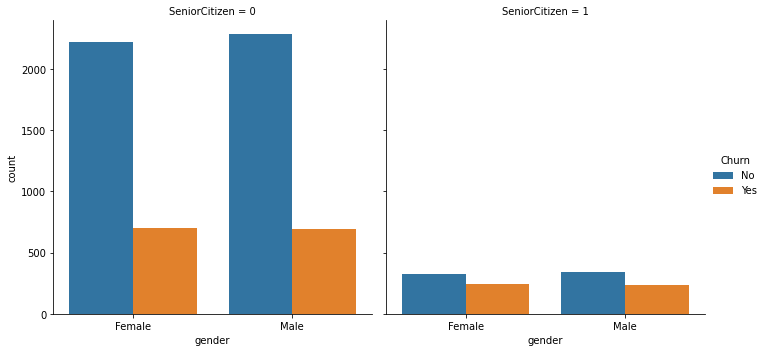

In [25]:
sns.catplot(x='gender', hue='Churn', col='SeniorCitizen', kind='count', data=data)

- Dari grafik diatas, Client pria dan wanita cukup berimbang untuk curn dan tidak churn, ini menandakan bahwa potensi churn tidak memandang gender, baik pria dan wanita dapat memiliki potensi yang sama untuk churn atau tidak churn
- Dilihat dari grafik Partner, yang paling banyak churn adalah client yang belum memiliki pasangan, ini bisa jadi dikarenakan bahwa client yang belum memiliki pasangan ini masih mempunyai pendapatan yang rendah dibandingkan yang sudah memiliki pasangan
- Dari grafik dependents, client yang belum memiliki tanggungan lebih banyak yang churn, ini bisa jadi berhubungan dengan client yang belum memiliki pasangan, karena belum memiliki partner maka belum memiliki tanggungan dan masih belum mempunyai pendapatan yang cukup sehingga berpotensi churn
- Dari grafik seniorcitizen, banyak yang berpotensi churn di client yang belum lansia, dilihat juga karena jumlah client yang lansia sedikit yang ditawari untuk berlangganan

## Info

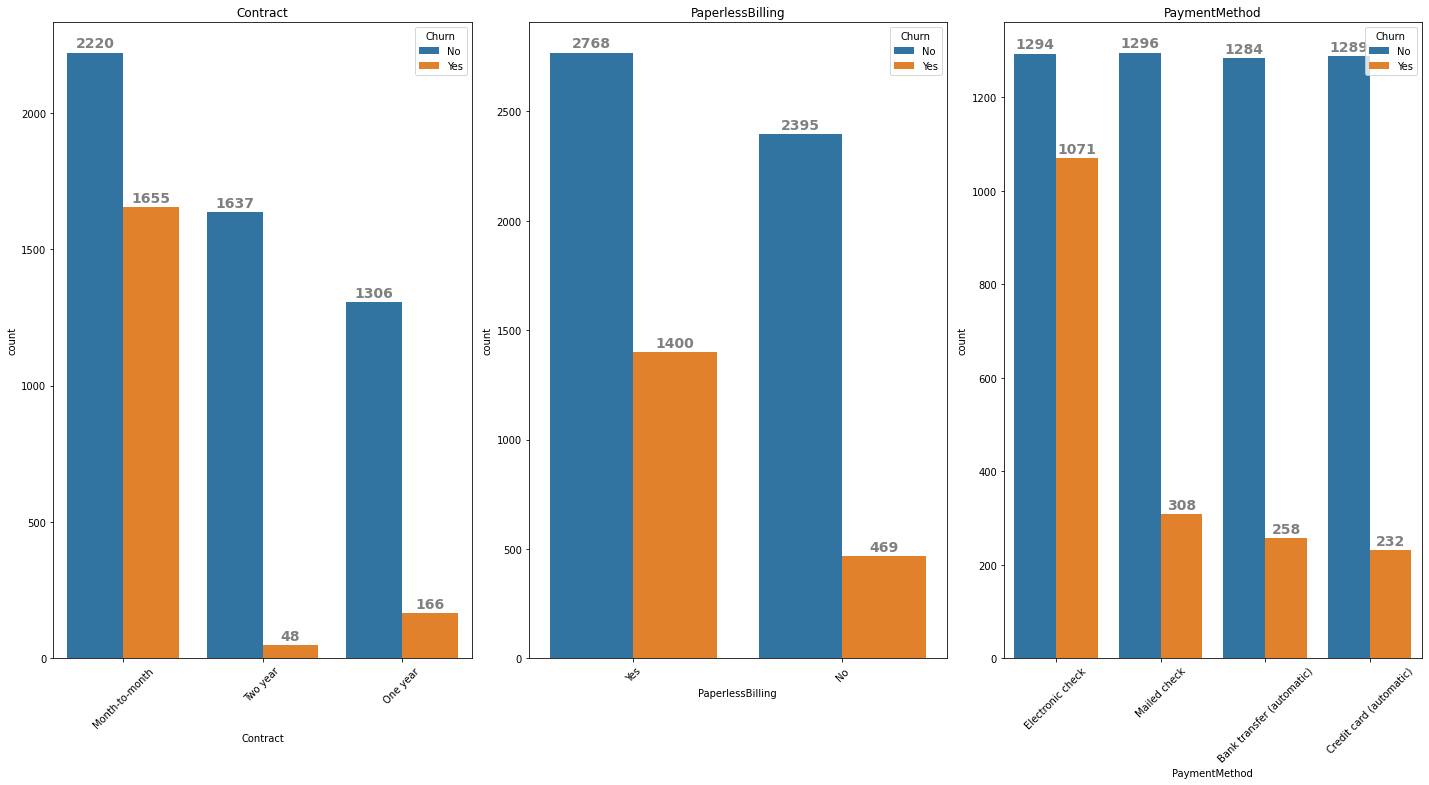

In [26]:
info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize = (20, 20))
for i in range(len(info)):
    plt.subplot(len(info)//2+1, 3, i + 1)
    ax = sns.countplot(
        x = data[info[i]],
        hue = data['Churn'],
        order = data[info[i]].value_counts().sort_values(ascending = False).index
    )
    for j in ax.patches:
        ax.annotate(
            format(j.get_height(), '.0f'),
            (j.get_x() + j.get_width() / 2., j.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    plt.title(str(info[i]))
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Dari account info pelanggan, dapat dilihat bahwa pelanggan yang Churn banyak yang berlangganan hanya bulanan, ini menandakan bahwa bisa jadi client ini hanya mencoba atau mungkin tidak serius untuk berlangganan, sehingga jika berlangganan bulanan ada potensi bulan selanjutnya akan churn dibandingkan yang berlanggana  pertahun, dan client yang menerima bill secara paperless dan membayar secara elektronik ini dapat berpotensi churn di bulan selanjutnya, lalu client dengan pembayaran credit atau bank transfer memiliki potensi tidak churn yang paling baik, sehingga teknik pembayaran ini bisa menjadi opsi terbaik.

## Services

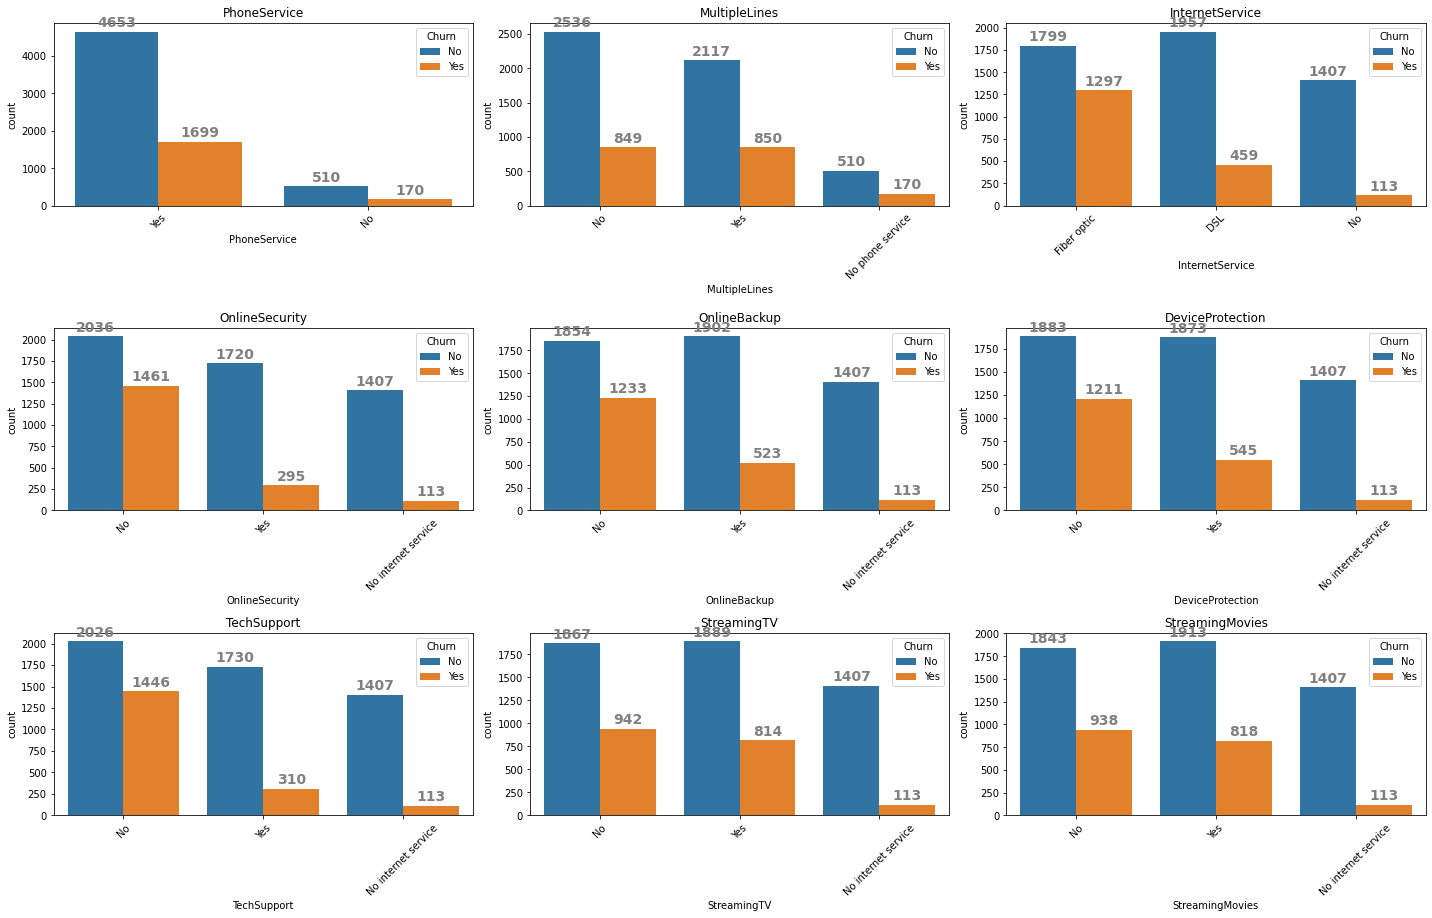

In [27]:
services = ['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize = (20, 20))
for i in range(len(services)):
    plt.subplot(len(services)//2+1, 3, i + 1)
    ax = sns.countplot(
        x = data[services[i]],
        hue = data['Churn'],
        order = data[services[i]].value_counts().sort_values(ascending = False).index
    )
    for j in ax.patches:
        ax.annotate(
            format(j.get_height(), '.0f'),
            (j.get_x() + j.get_width() / 2., j.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    plt.title(str(services[i]))
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Berdasarkan data services, client yang Churn adalah client yang berlangganan fiber optic, ini mungkin karena client tersebut sudah berlangganan internet maka client tersebut sudah tidak perlu berlangganan telco lagi sehingga berpotensi churn, lalu tidak memiliki online securityTidak memiliki online backup, Tidak memiliki device protection, Tidak memiliki tech support, dan jika dilihat, client yang tidak memiliki internet service atau phone service merupakan client yang memiliki potensi tidak churn yang cukup besar



Sehingga rekomendasi dari saya jika dilihat dari eda ini adalah:
- Mencari client yang memiliki MonthlyCharges rendah, TotalCharges rendah dan tenure yang tinggi
- Mencari di kalangan client yang belum termasuk lansia, memiliki pasangan dan setidaknya tidak memiliki tanggungan
- Mencari client yang tidak berlangganan internet fiber optic
- Menawarkan kepada client untuk berlangganan tahunan, dan membayar secara credit card atau bank transfer dan memberikan keuntungan jika berlangganan secara tahunan

In [28]:
data2 = data1.copy()

### Korelasi

In [29]:
data2_cor = data2.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
data2_cor.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


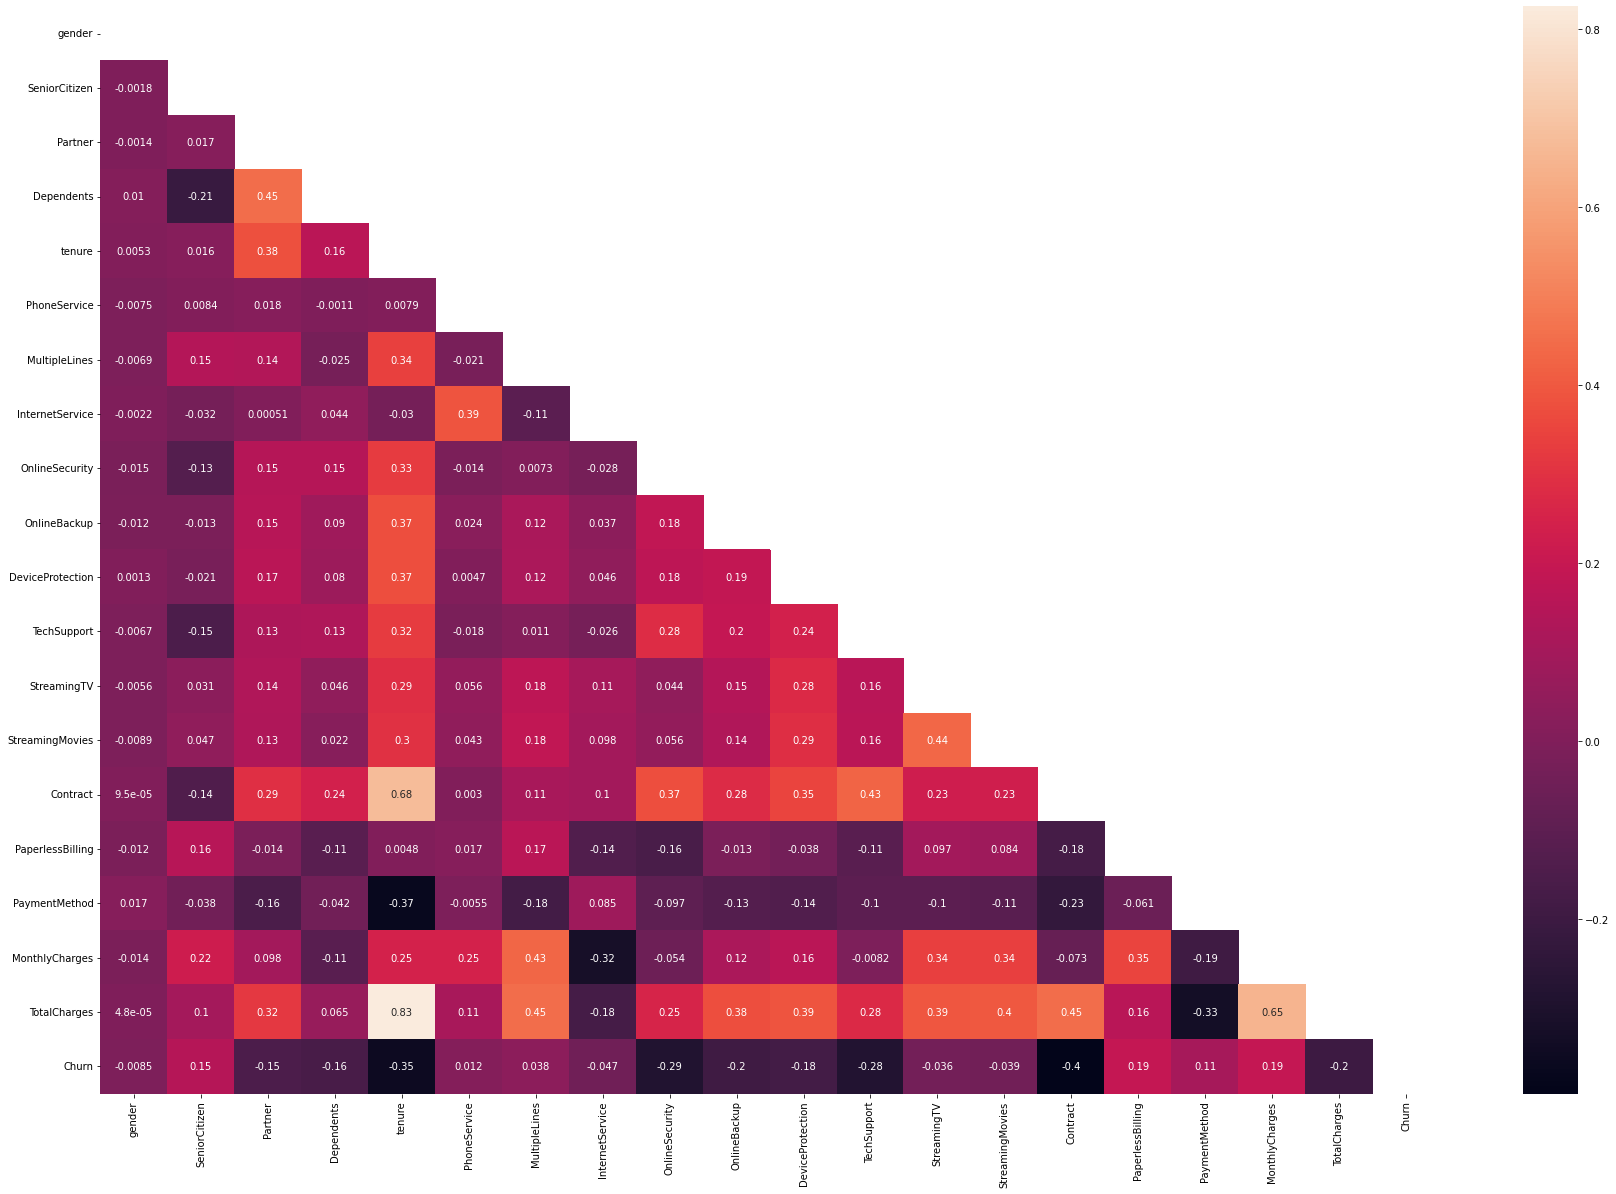

In [30]:
plt.figure(figsize = (30,20))
sns.heatmap(data2_cor.corr(), annot = True, mask = np.triu(data2_cor.corr()))

plt.show()


Dari grafik korelasi ini, ada beberapa kolom yang memiliki korelasi tinggi dengan target, yaitu kolom tenure berkorelasi negatif, online security berkorelasi negatif, tech support berkorelasi negatif, contract berkorelasi negatif dan total charges berkorelasi negatif, gender memiliki korelasi yang sangat kecil, dikarenakan dilihat dari EDA sebelumnya, gender tidak mempengaruhi seseorang itu churn atau tidak.

## Modeling

In [31]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

Disini saya merubah kondisi Churn, dimana untuk orang yang Churn menjadi 1 dan yang tidak Churn menjadi 0

In [33]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Label Encoder

In [34]:
data_encoded = data1.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Disini saya melakukan Encoding dengan Label Encoder, disini kenapa saya memilih encode jenis ini agar tidak ada penjumlahan feature, saya ingin feature di data ini tetap 19 dan jika menggunakan one hot encoding, feature ini akan bertambah lagi

In [35]:
data_encoded.shape

(7032, 20)

### Spliting Data

In [36]:
X = data_encoded.drop('Churn', axis = 1)
y = data_encoded['Churn']

In [37]:
X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 0.2, random_state = 15, stratify = y1)

In [38]:
input_pipeline = Pipeline(steps=[
    ['scaler', StandardScaler()],
])

In [39]:
input_pipeline.fit(X_train)

X_train = input_pipeline.transform(X_train)
X_val = input_pipeline.transform(X_val)
X_test = input_pipeline.transform(X_test)

In [40]:
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

Disini saya melakukan spliting data menggunakan sklearn untuk mensplit data Train, test dan validasi, lalu melakukan standard scaler.

Saya tidak melakukan normalisasi dengan tensorflow dikarenakan setelah melakukan normalisasi dengan tensorflow, terdapat beberapa error, sehingga saya pakai sklearn.

In [41]:
np.random.seed(1510)
tf.random.set_seed(1510)

In [42]:
datasets_train=tf.data.Dataset.from_tensor_slices((X_train,y_train))
datasets_val=tf.data.Dataset.from_tensor_slices((X_val,y_val))

In [43]:
datasets_train=datasets_train.shuffle(50).batch(64)
datasets_val=datasets_val.shuffle(50).batch(64)

Disini saya mencoba untuk membuat pipeline dari tensorflow, yang isinya untuk merubah data menjadi tensor dengan tf.data.Dataset.from_tensor_slices, dan menshuffle data tiap 50 data dan membagi data ke masing2 batch berisi 64 data

### Sequential Model

Pada Milestone1 ini, saya menggunakan model sequential dan model functional dengan model default dan penambahan parameter dropout, nilai accuracy disini untuk melihat meningkatnya score tiap epochs, dan untuk result metricsnya saya menggunakan Precision karena untuk menekan nilai FP

### Default

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(15, activation = 'relu', input_shape=(19,))) 
model.add(Dense(10, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


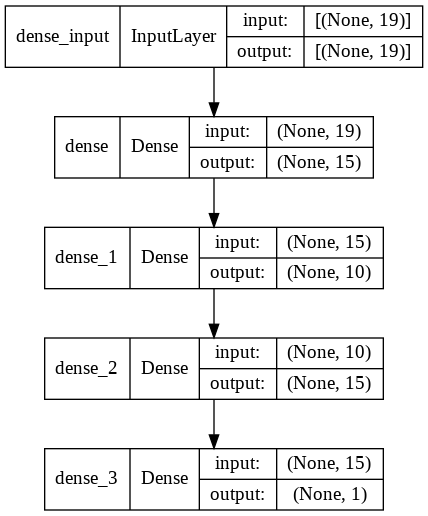

In [46]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

plot_model(model, "test.png", show_shapes=True)

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(datasets_train, epochs=100, validation_data=datasets_val)

Epoch 1/100
71/71 [==============================] - 1s 5ms/step - loss: 0.6893 - accuracy: 0.5833 - val_loss: 0.5732 - val_accuracy: 0.7253
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7396 - val_loss: 0.5039 - val_accuracy: 0.7378
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7691 - val_loss: 0.4789 - val_accuracy: 0.7653
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7780 - val_loss: 0.4672 - val_accuracy: 0.7733
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7824 - val_loss: 0.4595 - val_accuracy: 0.7787
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.7864 - val_loss: 0.4539 - val_accuracy: 0.7778
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7893 - val_loss: 0.4499 - val_accuracy: 0.7778
Epoch 8/100
7

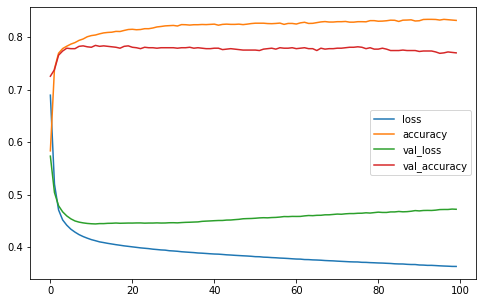

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [50]:
y_pred = model.predict(X_test)

In [51]:
pred = []
for i in y_pred:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

print(pred[:5])

[0, 0, 0, 0, 1]


In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [53]:
print(confusion_matrix(y_test, pred))

[[936  97]
 [198 176]]


Disini saya mencoba untuk menggunakan model sequential secara default, tanpa handling gradient problem, dari data ini terlihat dengan epoch 100 data tersebut overfitting dengan loss 0.3633, accuracy 0.8316, val_loss 0.4721, val_accuracy 0.7698, alasan menggunakan 100 epochs karena setelah mencoba epoch dengan niali lain, didapatkan 100 ini merupakan epoch yang paling maksimal, dilihat dari nilai accuracy dan loss nya juga cukup berbeda jauh, cukup overfitting, tetapi model ini mempunyai score precision yang cukup baik yaitu 0.64

### Add Drop Out

In [54]:
np.random.seed(1510)
tf.random.set_seed(1510)

In [55]:
model1 = Sequential()

model1.add(Dense(15, input_shape=(19,), activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(5, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation="sigmoid"))

In [56]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                300       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

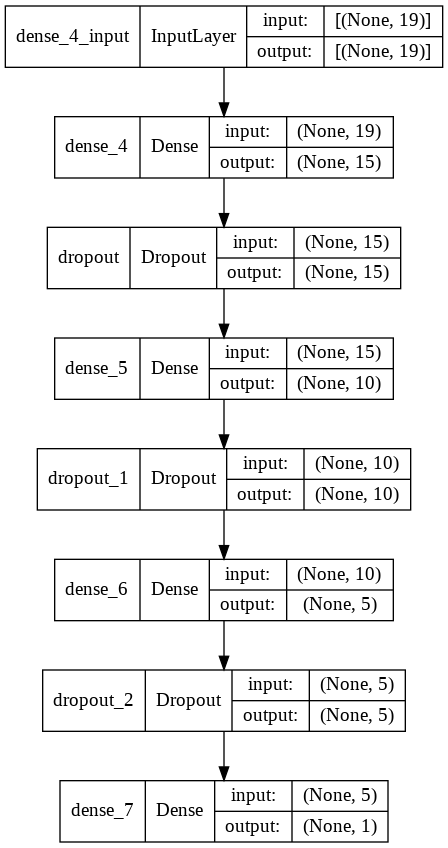

In [57]:
plot_model(model1, "test1.png", show_shapes=True)

In [58]:

model1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [59]:
history = model1.fit(datasets_train, epochs=100, validation_data=datasets_val)

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.5569 - val_loss: 0.6083 - val_accuracy: 0.7164
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6922 - val_loss: 0.5391 - val_accuracy: 0.7476
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7384 - val_loss: 0.5048 - val_accuracy: 0.7449
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7431 - val_loss: 0.4874 - val_accuracy: 0.7440
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7442 - val_loss: 0.4768 - val_accuracy: 0.7547
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7513 - val_loss: 0.4695 - val_accuracy: 0.7591
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7567 - val_loss: 0.4660 - val_accuracy: 0.7573
Epoch 8/100
7

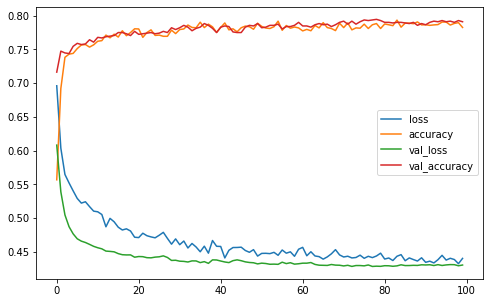

In [60]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [61]:
y_pred = model1.predict(X_test)

In [62]:
pred1 = []
for i in y_pred:
    if i > 0.5:
        pred1.append(1)
    else:
        pred1.append(0)

print(pred1[:5])

[0, 0, 0, 0, 1]


In [63]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1033
           1       0.69      0.39      0.50       374

    accuracy                           0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



In [64]:
print(confusion_matrix(y_test, pred1))

[[968  65]
 [228 146]]


Model sequence kedua, daya coba menambahkan dropout di tiap layer, tujuan drop out ini untuk memotong koneksi agar informasi bisa teraliri dengan sempurna, dan agar tidak overfitting, disini saya menambahkan dropout 0.3, hasil model ini cukup bagus, sudah terlihat cukup homogen dan tidak terjadi overfitting, dengan loss: 0.4404 - accuracy: 0.7827 - val_loss: 0.4306 - val_accuracy: 0.7911, dilihat dari score ini, rentang score accuracy dan loss tidak memiliki rentang yang jauh, dan model ini memiliki kenaikan score precision menjadi 0.69

### Functional Model

### Default

In [65]:
input_ = keras.layers.Input(shape=(19,))
hidden1 = keras.layers.Dense(15, activation="relu")(input_)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(5, activation="relu")(hidden2)
output = keras.layers.Dense(1, activation="sigmoid")(hidden3)
model_f = keras.models.Model(inputs=[input_], outputs=[output])
model_f.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [66]:
model_f.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_8 (Dense)             (None, 15)                300       
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


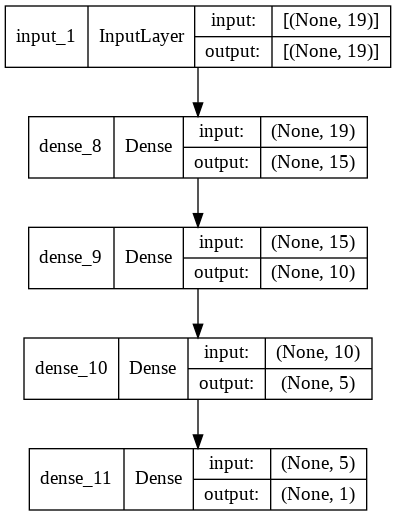

In [67]:
plot_model(model_f, "test.png", show_shapes=True)

In [68]:
history = model_f.fit(datasets_train, epochs=100, validation_data=(datasets_val))

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 0.5867 - accuracy: 0.6913 - val_loss: 0.5244 - val_accuracy: 0.7369
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7436 - val_loss: 0.4823 - val_accuracy: 0.7484
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7718 - val_loss: 0.4654 - val_accuracy: 0.7582
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7849 - val_loss: 0.4564 - val_accuracy: 0.7644
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7922 - val_loss: 0.4503 - val_accuracy: 0.7618
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.7980 - val_loss: 0.4456 - val_accuracy: 0.7618
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8007 - val_loss: 0.4422 - val_accuracy: 0.7671
Epoch 8/100
7

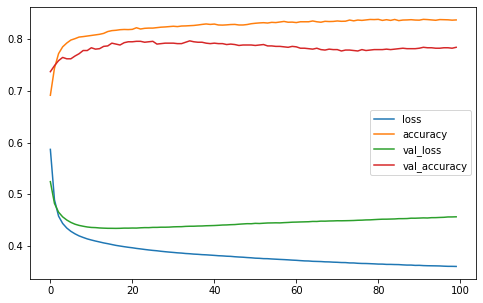

In [69]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [70]:
y_pred = model_f.predict(X_test)

In [71]:
pred2 = []
for i in y_pred:
    if i > 0.5:
        pred2.append(1)
    else:
        pred2.append(0)

print(pred2[:5])

[0, 0, 0, 0, 1]


In [72]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.61      0.56      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Model yang kedua adalah model dengan functional, melakukan cara yang sama dengan sequential, yaitu model default yang dipakai, dari data ini terlihat data cukup overfitting, dari 100 epochs didapatkan nilai loss: 0.3605 - accuracy: 0.8369 - val_loss: 0.4565 - val_accuracy: 0.7840, terlihat dari nilai accuracy dan loss antara validasi dan train memiliki rentang yang lumayan jauh.

In [73]:
print(confusion_matrix(y_test, pred2))

[[899 134]
 [165 209]]


### Add Drop Out

In [74]:
input_ = keras.layers.Input(shape=(19,))
hidden1 = keras.layers.Dense(15, activation="relu")(input_)
drop1 = keras.layers.Dropout(0.3)(hidden1)
hidden2 = keras.layers.Dense(10, activation="relu")(drop1)
drop2 = keras.layers.Dropout(0.3)(hidden2)
hidden3 = keras.layers.Dense(5, activation="relu")(drop2)
drop3 = keras.layers.Dropout(0.3)(hidden3)
output = keras.layers.Dense(1, activation="sigmoid")(drop3)
model_f1 = keras.models.Model(inputs=[input_], outputs=[output])
model_f1.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [75]:
model_f1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_12 (Dense)            (None, 15)                300       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0   

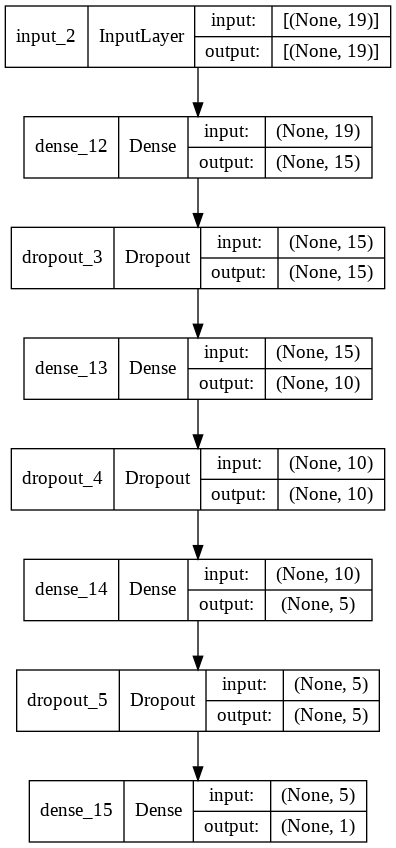

In [76]:
plot_model(model_f1, "test.png", show_shapes=True)

In [77]:
history = model_f1.fit(datasets_train, epochs=100, validation_data=(datasets_val))

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 0.7124 - accuracy: 0.5431 - val_loss: 0.6286 - val_accuracy: 0.7351
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.6172 - accuracy: 0.7111 - val_loss: 0.5626 - val_accuracy: 0.7342
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7242 - val_loss: 0.5208 - val_accuracy: 0.7342
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7247 - val_loss: 0.4998 - val_accuracy: 0.7342
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7311 - val_loss: 0.4829 - val_accuracy: 0.7342
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7324 - val_loss: 0.4739 - val_accuracy: 0.7342
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7318 - val_loss: 0.4680 - val_accuracy: 0.7342
Epoch 8/100
7

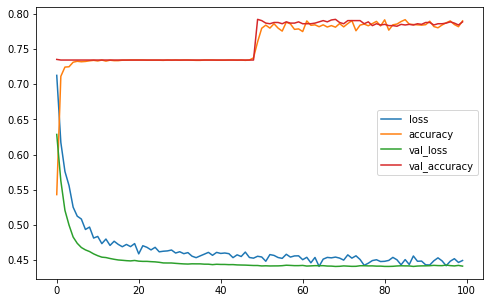

In [78]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [79]:
y_pred = model_f1.predict(X_test)

In [80]:
pred3 = []
for i in y_pred:
    if i > 0.5:
        pred3.append(1)
    else:
        pred3.append(0)

print(pred3[:5])

[0, 0, 0, 0, 1]


In [81]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [82]:
print(confusion_matrix(y_test, pred3))

[[929 104]
 [178 196]]


Model selanjutnya dari functional ini adalah model dengan menggunakan drop out, dari 100 epochs, model ini mendapatkan score loss: 0.4495 - accuracy: 0.7898 - val_loss: 0.4415 - val_accuracy: 0.7884, model ini sudah cukup tidak ada overfitting, dengan rentang score accuracy dan loss dari validation dan training yang tidak terlalu jauh dan dari grafik sudah cukup homogen dengan nilai Precision 0.65.

Dari kedua model ini memili nilai precision yang tidak terlalu jauh, namun untuk pemilihan model terbaik disini, saya memilih model sequential dengan drop out, yang memiliki nilai precision 0.69, jika dibandingkan dengan model functional dengan drop out, model functional tersebut memiliki nilai precision 0.65, dari score ini terlihat model sequential memiliki nilai precision terbaik, dan juga jika melihat dari confussion matrix, model sequential dapat menekan nilai False Positif lebih baik dibandingkan dengan model functional

## Model Inference

Disini saya mencoba melakukan test menggunakan data baru dari hasil model yang sudah di save sebelumnya

In [83]:
model1.save("Model.h5")


In [84]:
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [85]:
try1 =[{'gender':1, 
            'SeniorCitizen':0, 
            'Partner':1, 
            'Dependents':1, 
            'tenure':20,
            'PhoneService':1, 
            'MultipleLines':2, 
            'InternetService':1, 
            'OnlineSecurity':2,
            'OnlineBackup':0, 
            'DeviceProtection':0, 
            'TechSupport':0,
            'StreamingTV':2,
            'StreamingMovies':2, 
            'Contract':0, 
            'PaperlessBilling':0, 
            'PaymentMethod':0,
            'MonthlyCharges':100, 
            'TotalCharges':500}]

try1 =pd.DataFrame(try1,index=[0])
try1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,20,1,2,1,2,0,0,0,2,2,0,0,0,100,500


In [86]:
model = keras.models.load_model("Model.h5")

In [87]:
ss = StandardScaler()
try2 = ss.fit_transform(try1)

In [88]:
pred = model.predict(try2)
pred

array([[0.15943736]], dtype=float32)

In [89]:
if pred>0.5:
    print('Churn')
else:
    print('Not Churn')

Not Churn


## Kesimpulan

- Dilihat dari grafik MonthlyCharges, TotalCharges dan tenure, client yang Churn kebanyakan memiliki monthly charges yang besar, total charges yang cenderung rendah dan tenure yang rendah.
- Dilihat dari grafik Partner, yang paling banyak churn adalah client yang belum memiliki pasangan
- Dari grafik dependents, client yang belum memiliki tanggungan lebih banyak yang churn
- Dari grafik seniorcitizen, banyak yang berpotensi churn di client yang belum lansia
- Dari account info pelanggan, dapat dilihat bahwa pelanggan yang Churn banyak yang berlangganan hanya bulanan,dan client yang menerima bill secara paperless dan membayar secara elektronik ini dapat berpotensi churn di bulan selanjutnya, lalu client dengan pembayaran credit atau bank transfer memiliki potensi tidak churn yang paling baik
- Berdasarkan data services, client yang Churn adalah client yang berlangganan fiber optic, lalu tidak memiliki online securityTidak memiliki online backup, Tidak memiliki device protection, Tidak memiliki tech support, dan jika dilihat, client yang tidak memiliki internet service atau phone service merupakan client yang memiliki potensi tidak churn yang cukup besar
- Model yang digunakan adalah sequential dan functional
- Model yang default, terdapat overfitting, ini bisa jadi diakrenakan model tidak menyebarkan informasi yang baik ke setiap layer
- Model yang menggunakan drop out dapat mengurangi overfitting, bisa jadi drop out ini memotong koneksi dari beberapa layer dan dapet menyalurkan informasi lebih baik kepada tiap layer
- Model yang digunakan adalah sequential dengan drop out, karena memiliki precision score yang baik dan accuracy yang bagus